# Day 13 - Transparent Origami

## Part 1
**How many dots are visible** after completing **just the first fold instruction** on your transparent paper?

In [150]:
import numpy as np
from PIL import Image

In [151]:
def parse(file):
    with open(file, "r") as f:
        lines = f.readlines()
    
    positions = []
    instructions = []
    for line in lines:
        line = line.strip()
        if not line:
            continue
        
        if line.startswith("fold"):
            line = line.split(" ")[2]
            axis, value = line.split("=")
            instructions.append((axis, int(value)))
        else:
            x, y = line.split(",")
            # Flipping x and y to get proper orientation 
            # y defining the height and 
            # x defining the width
            positions.append((int(y), int(x)))

    max_x = max([p[0] for p in positions])
    max_y = max([p[1] for p in positions])
    
    if max_x % 2:
        max_x += 1

    if max_y % 2:
        max_y += 1

    shape = (max_x + 1, max_y + 1)    
    
    print(f"PARSED SHAPE: {shape} - {shape[0]%2} {shape[1]%2}")
    
    data = np.zeros(shape, dtype=np.bool8)
    
    for x, y in positions:
        data[x, y] = True
    
    return data, instructions

In [152]:

def visualize(data, scale=1):
    image = Image.fromarray(np.int8(data) * 50, mode="L")
    new_size = (image.size[0] * scale, image.size[1] * scale)
    display(image.resize(new_size, resample=Image.BOX))

In [153]:

def run_fold_instructions(paper: np.matrix, instructions: list[list[str]], scale=1):
    for i, (axis, value) in enumerate(instructions):
        axis = ["y", "x"].index(axis)
        print(f"Step {i:02d}: Fold axis {axis} at {value}")
        a, cut, b = np.split(paper, [value, value+1], axis=axis)
        
        # visualize(a, scale=scale)
        # visualize(cut, scale=scale)
        # visualize(b, scale=scale)
        
        paper = a + np.flip(b, axis=axis)
        
        dots = len(paper.nonzero()[0])
        print(f"Dot Count: {dots}")
        
        visualize(paper, scale=(i+1)*scale)
        print("--------------------------------------")
        # break

PARSED SHAPE: (15, 11) - 1 1
Step 00: Fold axis 0 at 7
Dot Count: 17


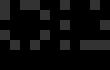

--------------------------------------
Step 01: Fold axis 1 at 5
Dot Count: 16


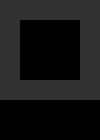

--------------------------------------


In [154]:
test_data, test_instructions = parse("13_test.in")
run_fold_instructions(test_data, test_instructions, scale=10)

PARSED SHAPE: (895, 1311) - 1 1
Step 00: Fold axis 1 at 655
Dot Count: 755


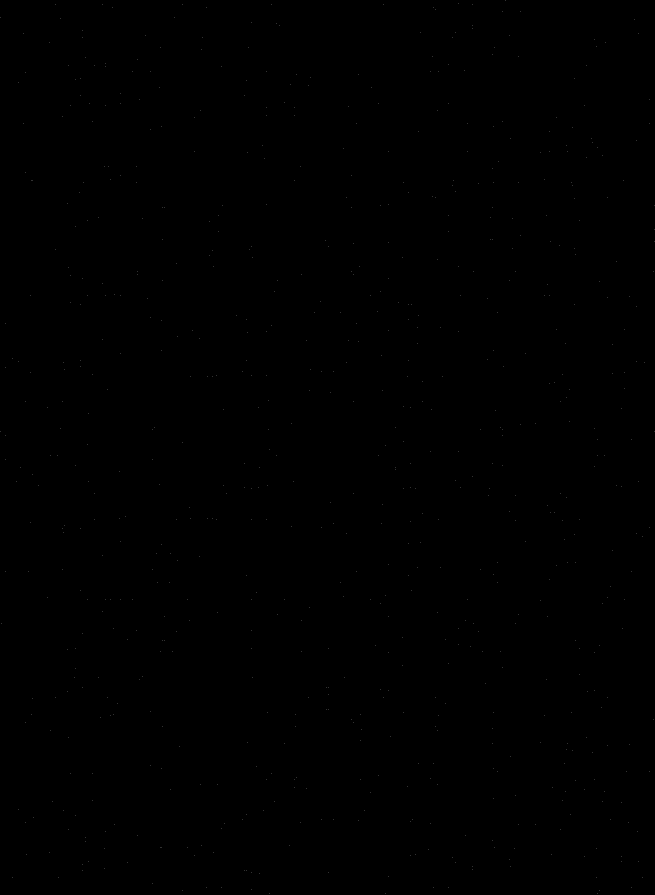

--------------------------------------
Step 01: Fold axis 0 at 447
Dot Count: 622


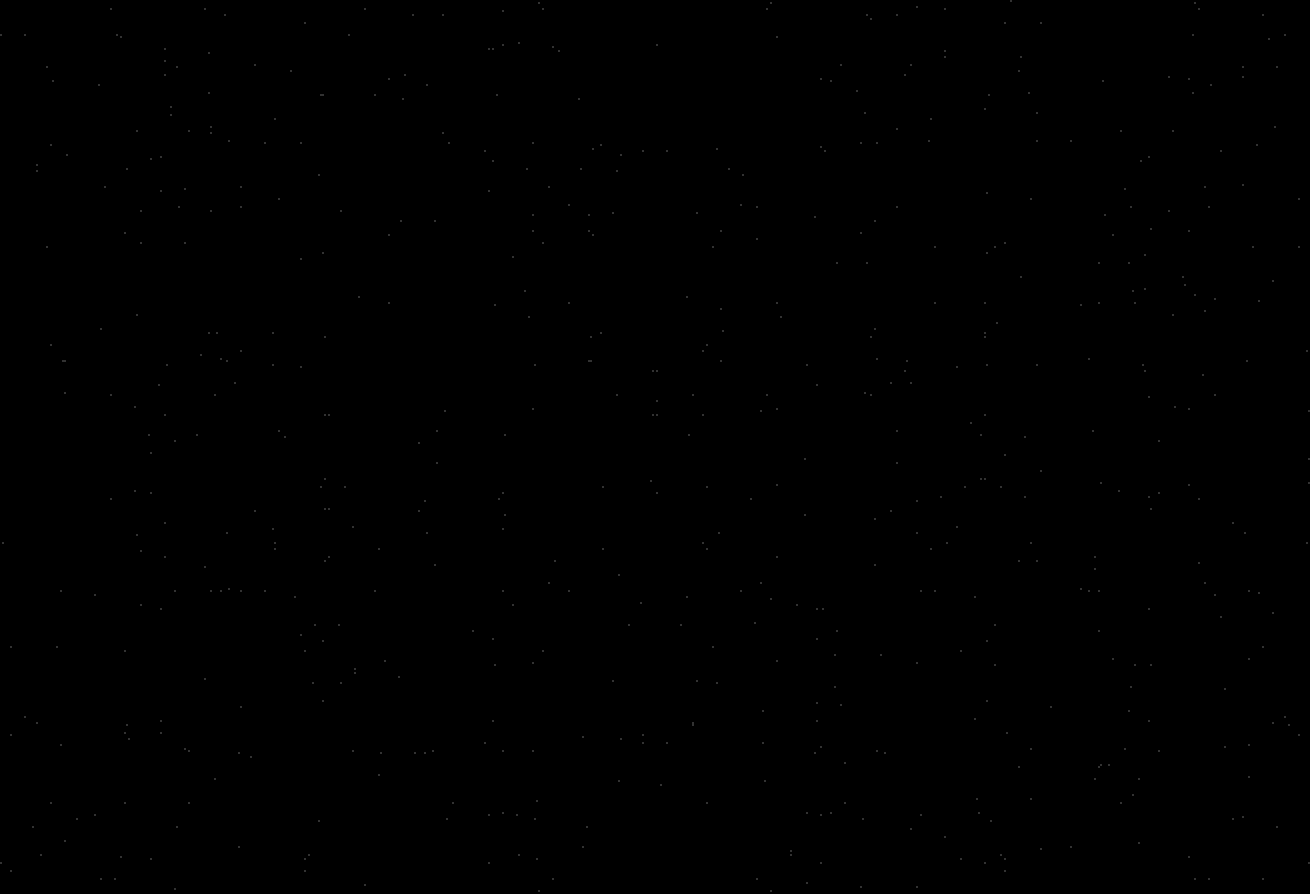

--------------------------------------
Step 02: Fold axis 1 at 327
Dot Count: 517


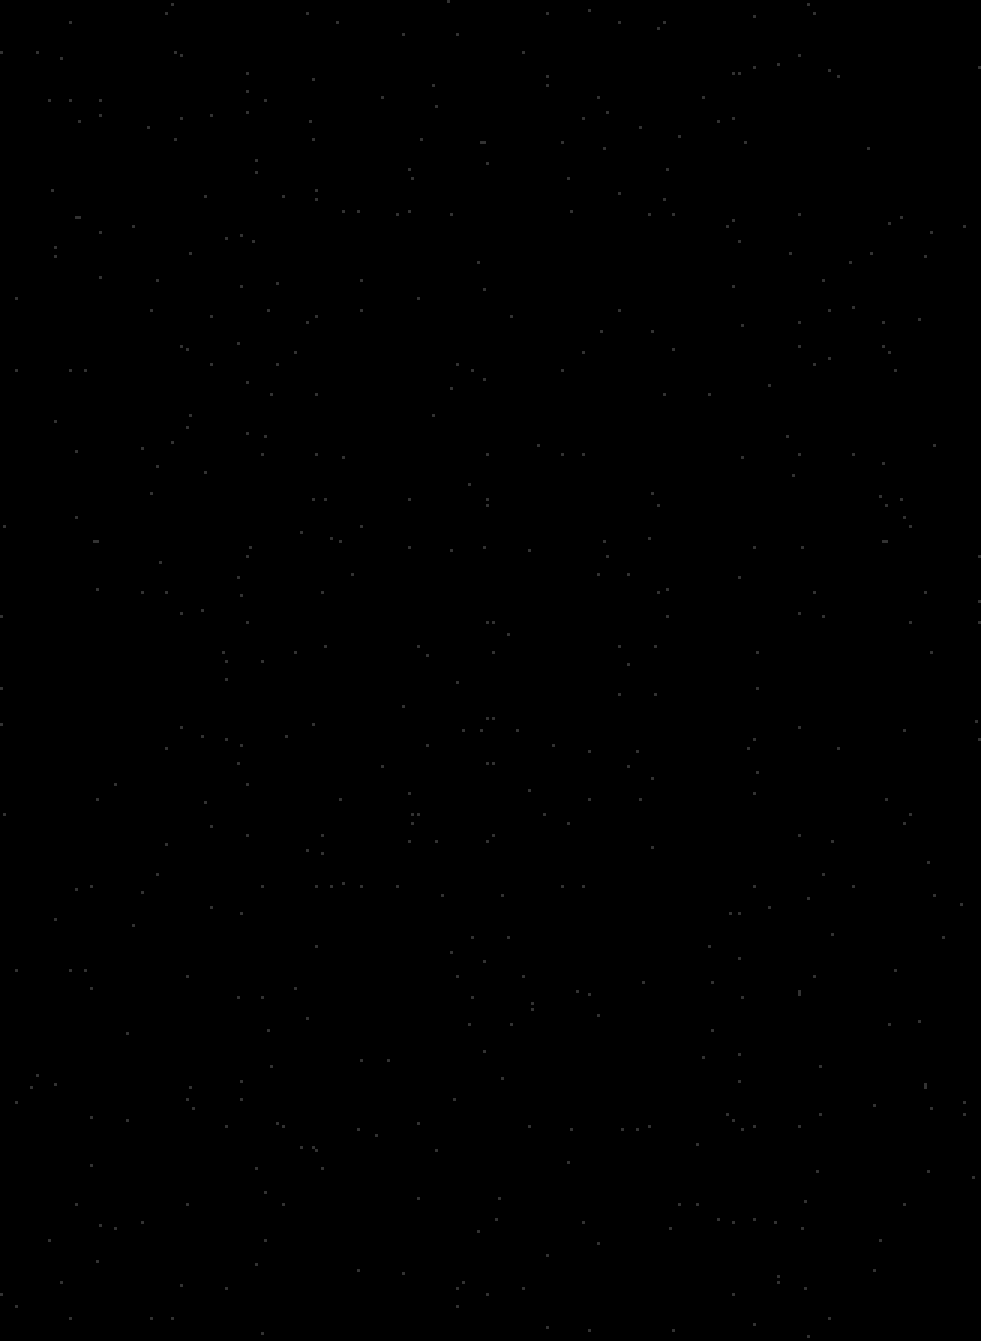

--------------------------------------
Step 03: Fold axis 0 at 223
Dot Count: 427


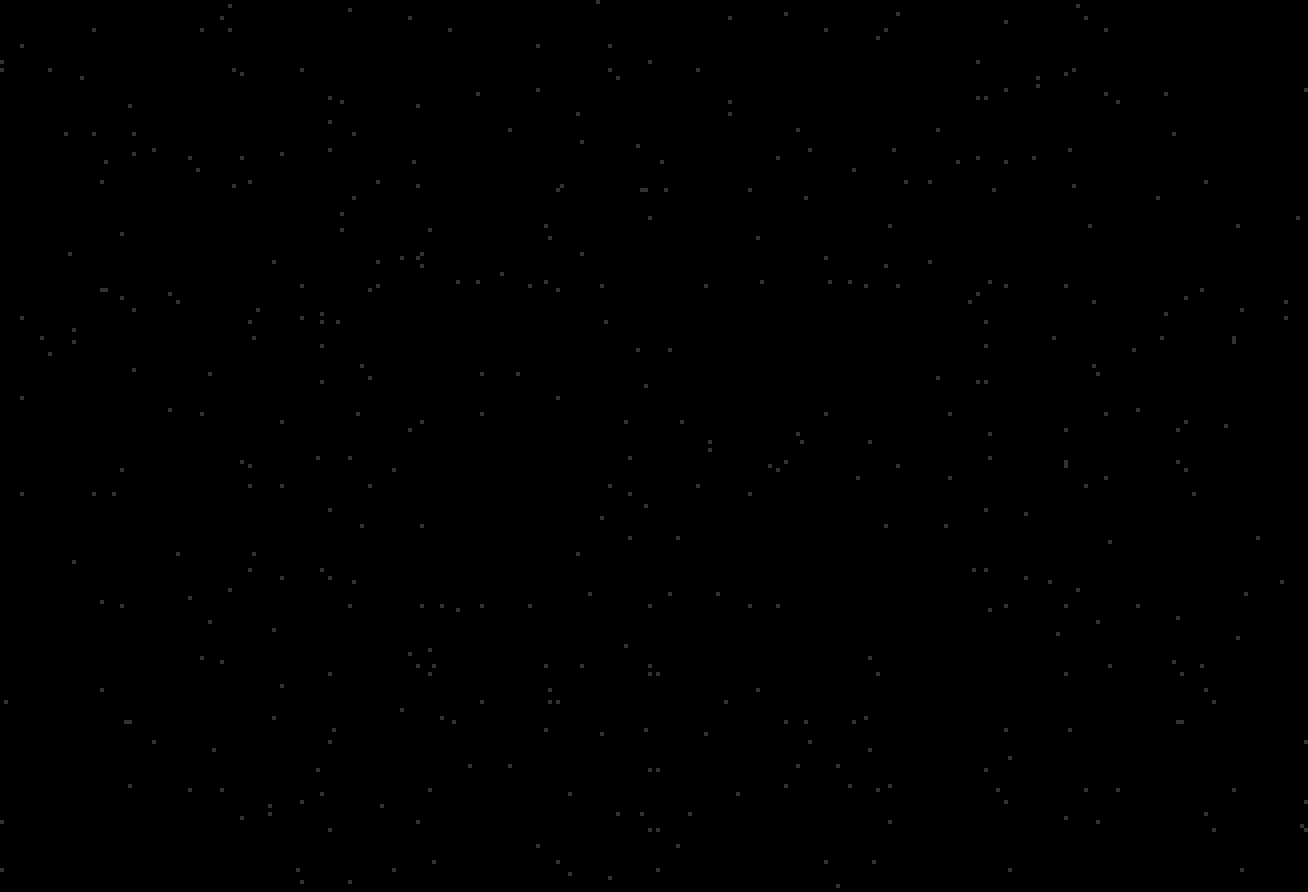

--------------------------------------
Step 04: Fold axis 1 at 163
Dot Count: 351


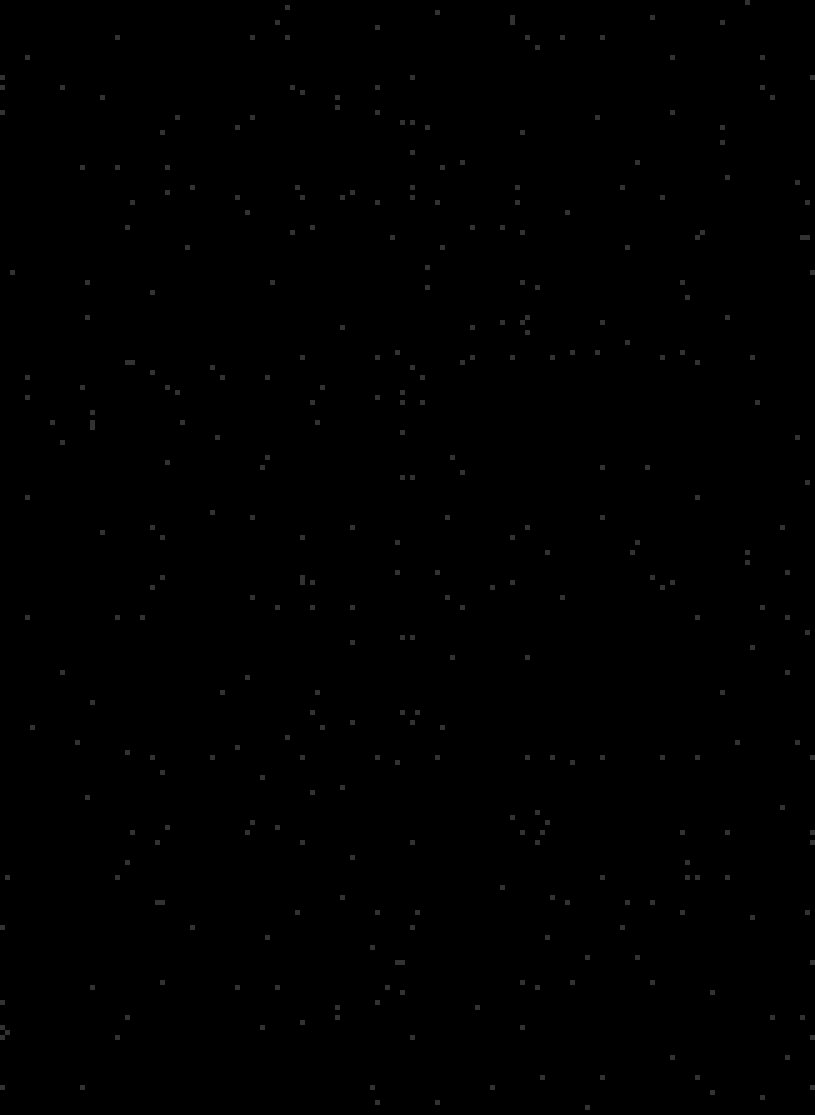

--------------------------------------
Step 05: Fold axis 0 at 111
Dot Count: 295


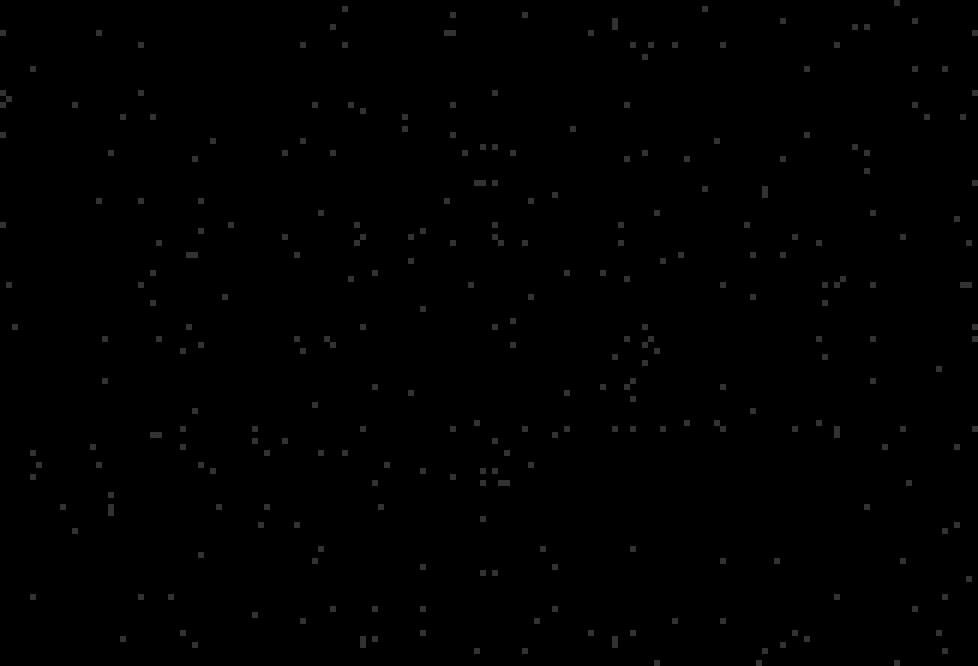

--------------------------------------
Step 06: Fold axis 1 at 81
Dot Count: 241


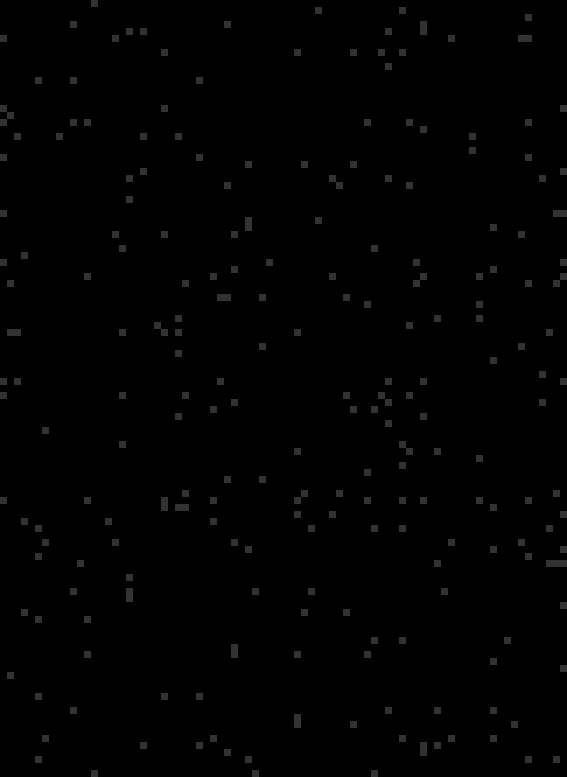

--------------------------------------
Step 07: Fold axis 0 at 55
Dot Count: 197


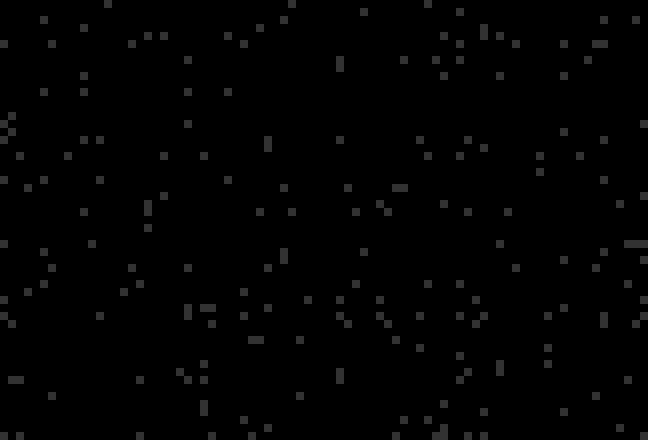

--------------------------------------
Step 08: Fold axis 1 at 40
Dot Count: 164


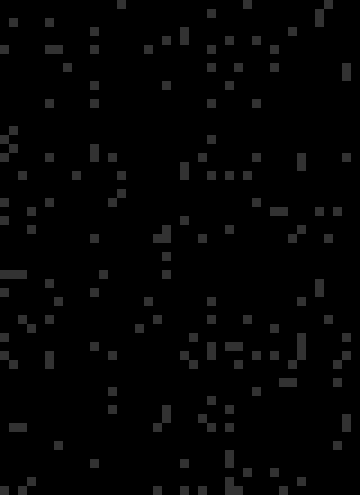

--------------------------------------
Step 09: Fold axis 0 at 27
Dot Count: 140


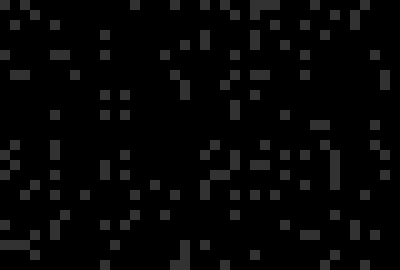

--------------------------------------
Step 10: Fold axis 0 at 13
Dot Count: 116


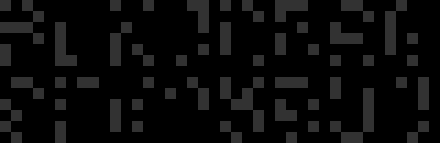

--------------------------------------
Step 11: Fold axis 0 at 6
Dot Count: 101


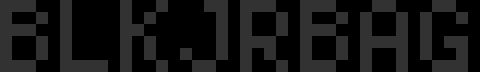

--------------------------------------


In [155]:
data, instructions = parse("13_input.in")
run_fold_instructions(data, instructions)

PARSED SHAPE: (895, 1311) - 1 1
Step 00: Fold axis 1 at 655
Dot Count: 850


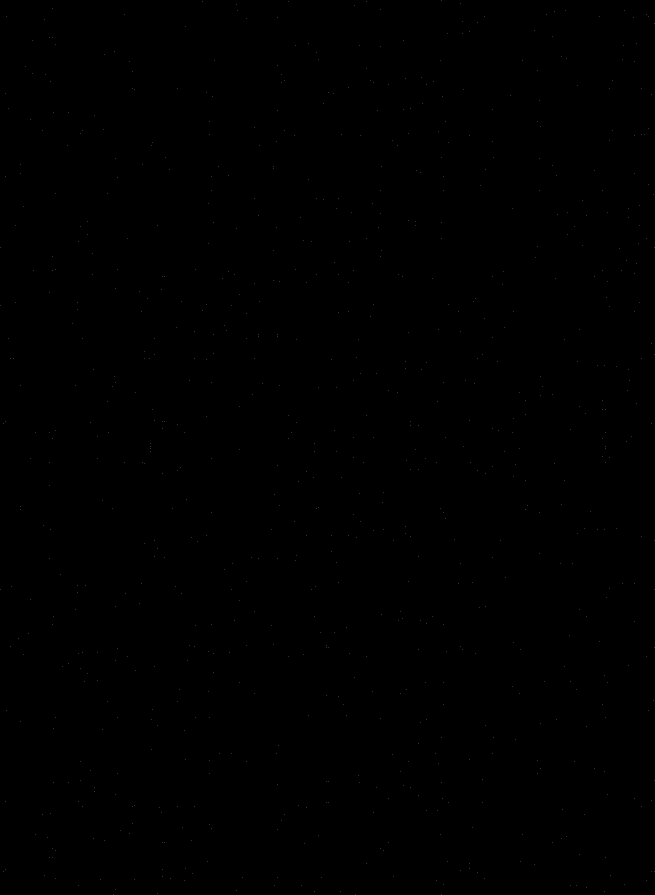

--------------------------------------
Step 01: Fold axis 0 at 447
Dot Count: 698


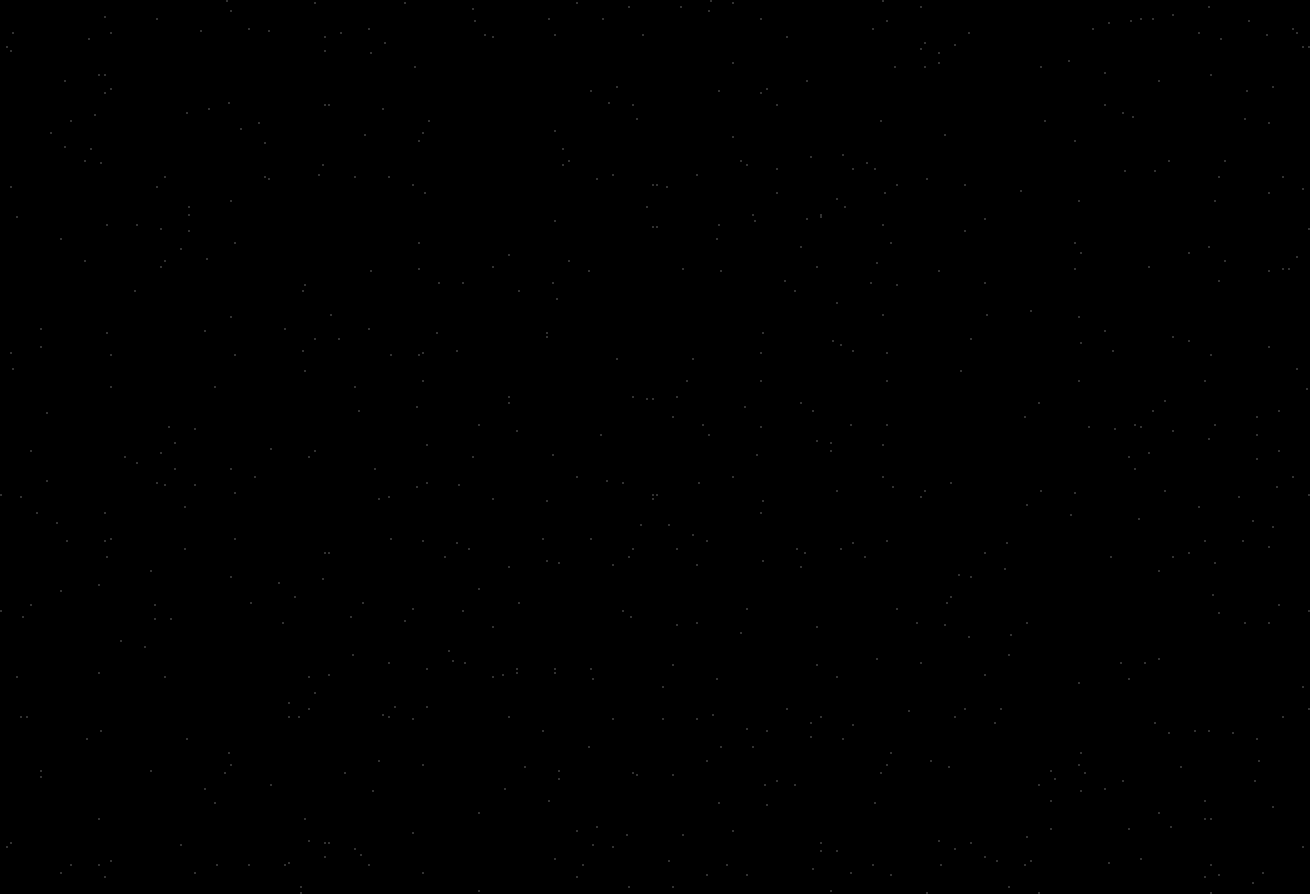

--------------------------------------
Step 02: Fold axis 1 at 327
Dot Count: 588


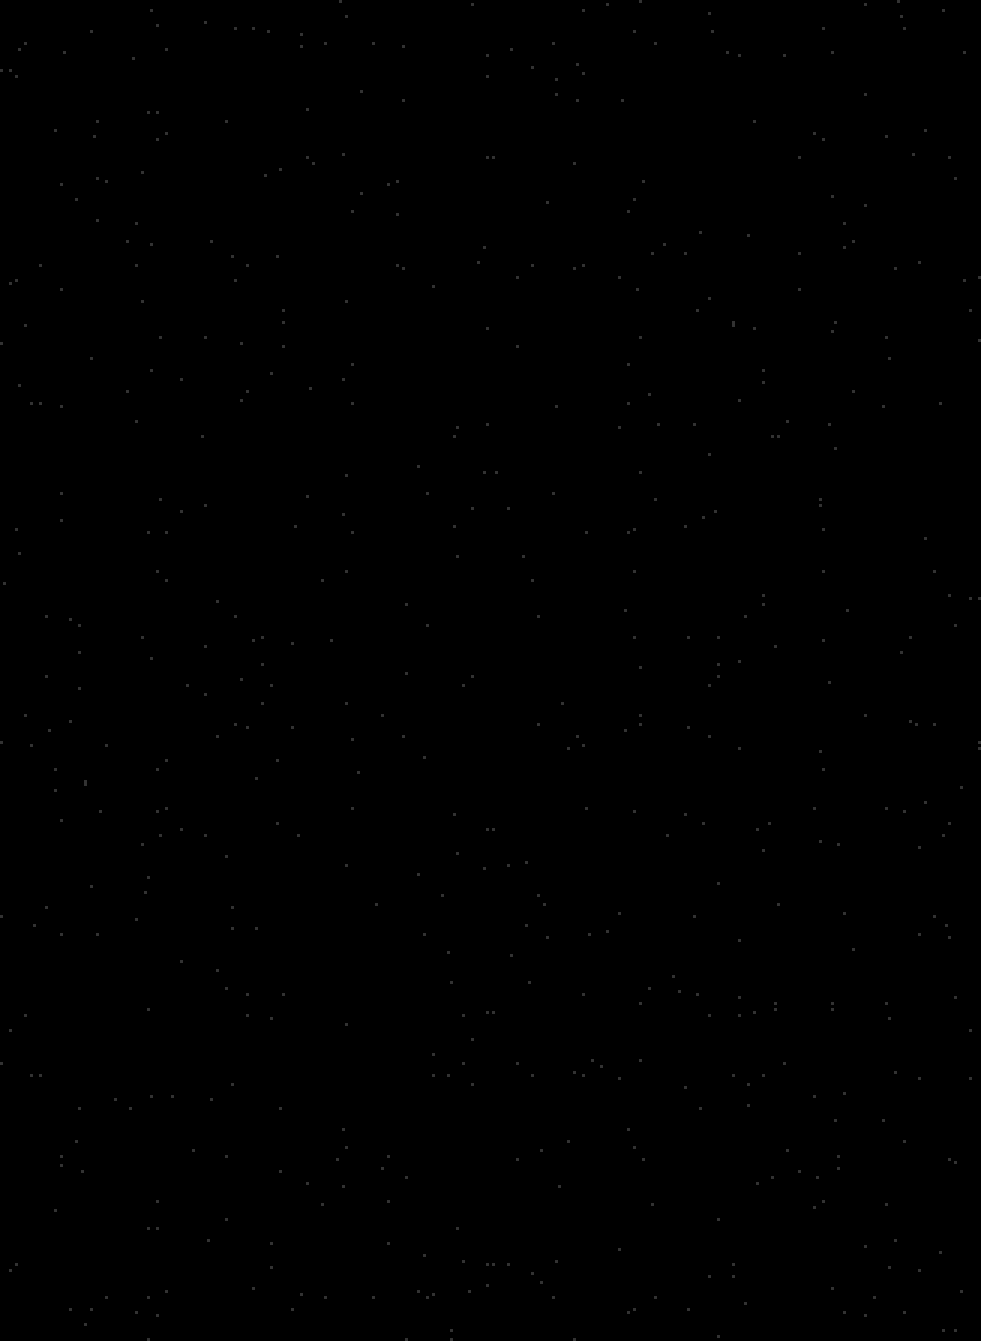

--------------------------------------
Step 03: Fold axis 0 at 223
Dot Count: 494


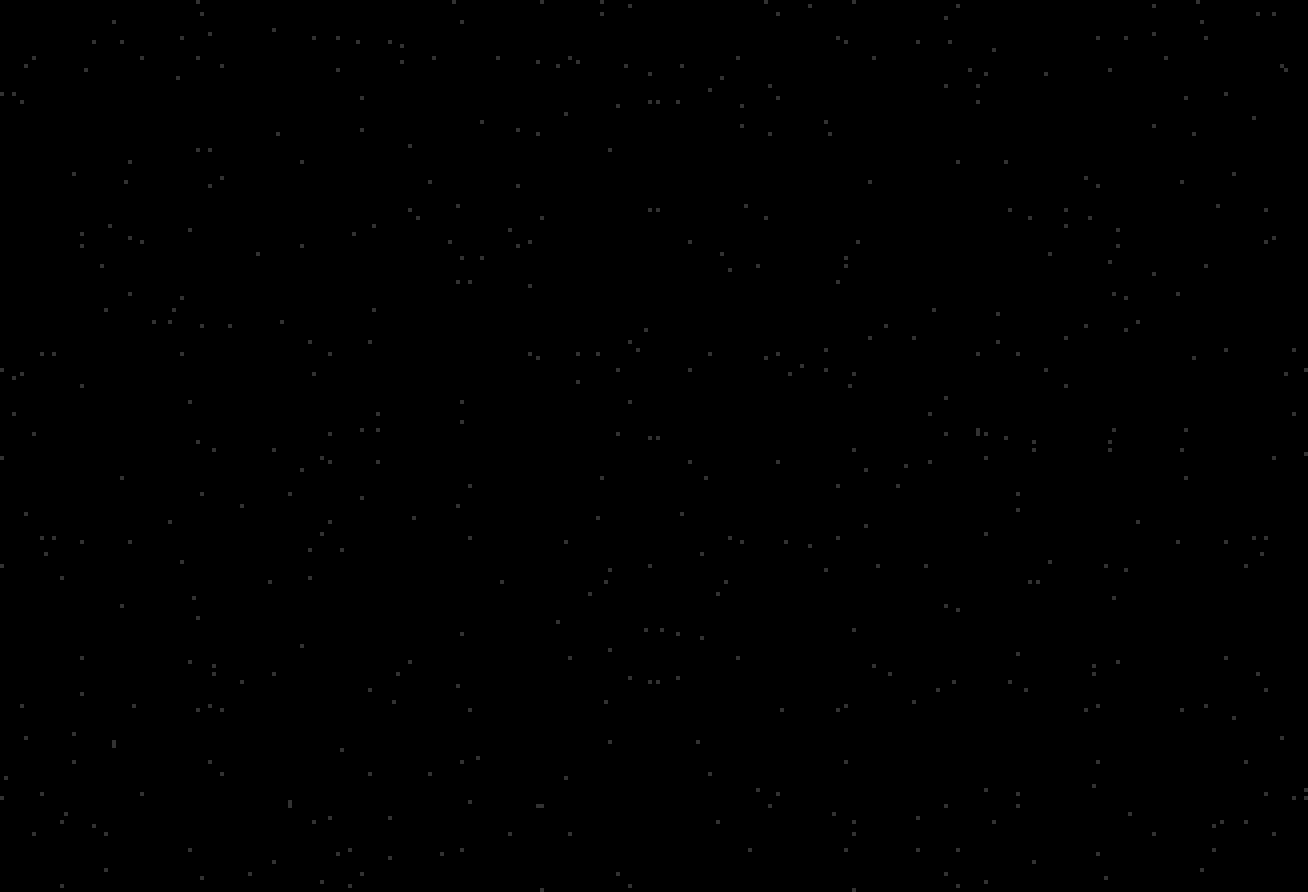

--------------------------------------
Step 04: Fold axis 1 at 163
Dot Count: 398


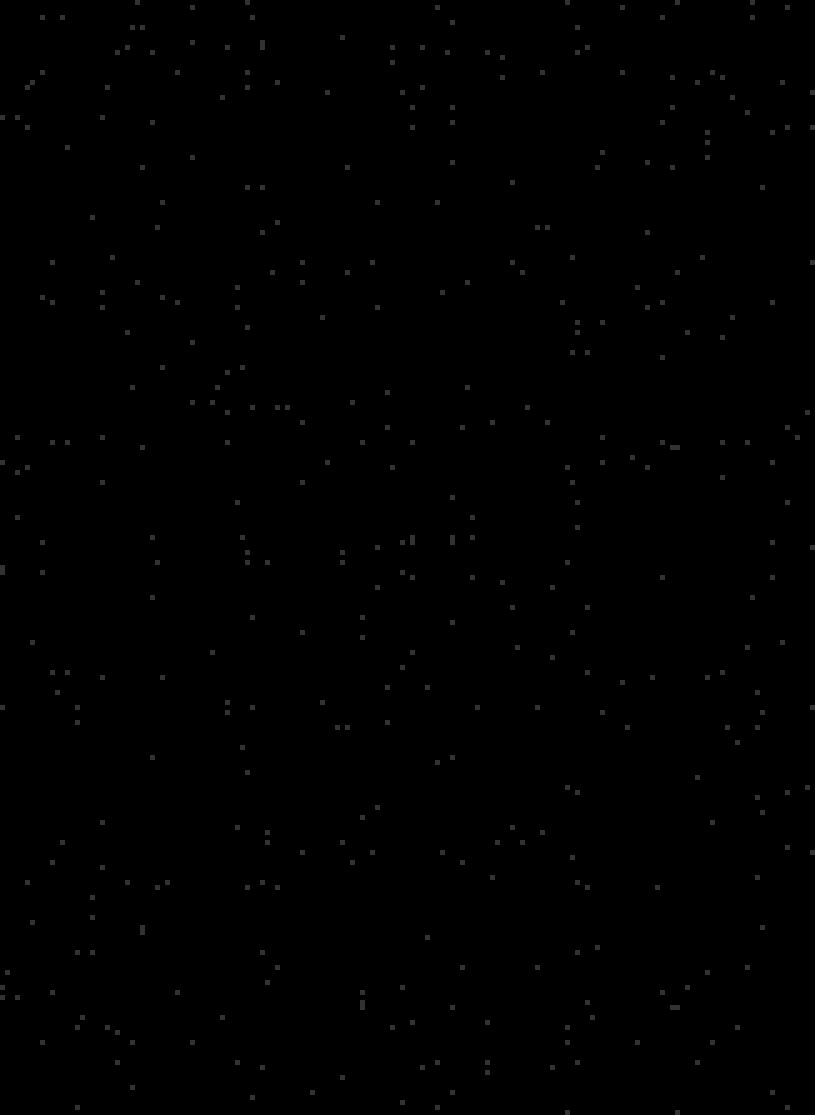

--------------------------------------
Step 05: Fold axis 0 at 111
Dot Count: 344


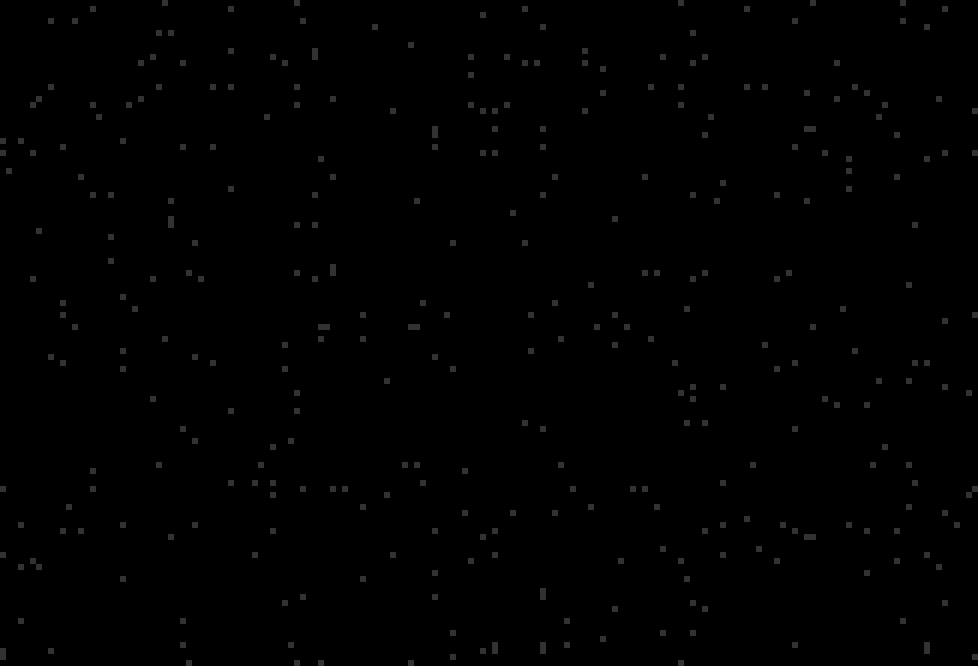

--------------------------------------
Step 06: Fold axis 1 at 81
Dot Count: 280


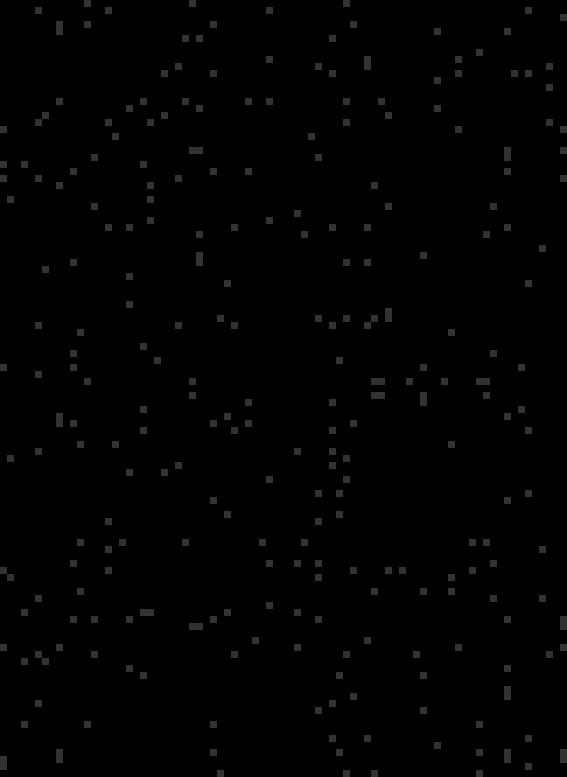

--------------------------------------
Step 07: Fold axis 0 at 55
Dot Count: 231


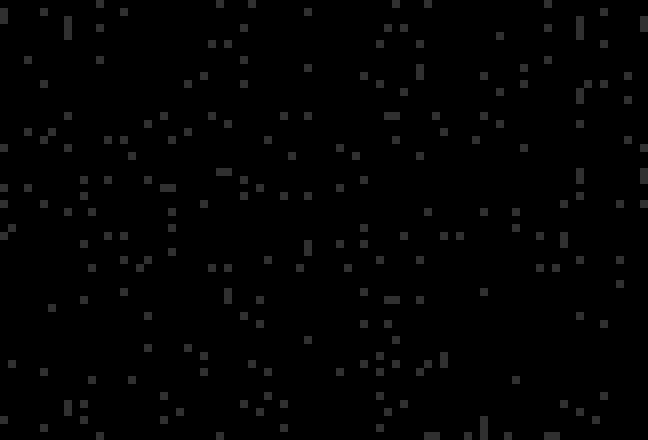

--------------------------------------
Step 08: Fold axis 1 at 40
Dot Count: 190


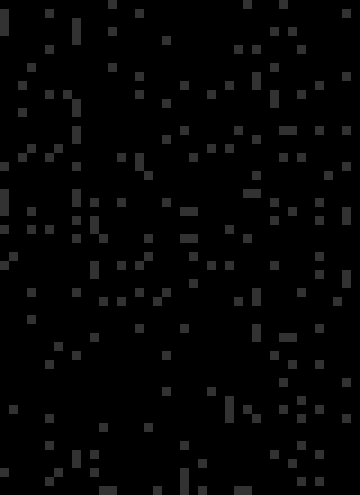

--------------------------------------
Step 09: Fold axis 0 at 27
Dot Count: 155


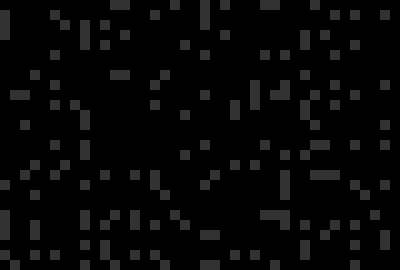

--------------------------------------
Step 10: Fold axis 0 at 13
Dot Count: 122


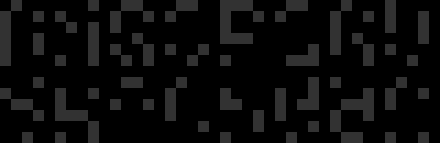

--------------------------------------
Step 11: Fold axis 0 at 6
Dot Count: 102


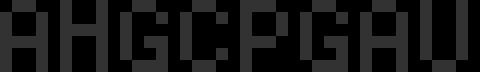

--------------------------------------


In [156]:
data, instructions = parse("13_input2.in")
run_fold_instructions(data, instructions)